# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Judul</b>
Energy Efficiency

<b>Anggota Kelompok</b>
1. Fauzan Naufal Rizqi - 1301213369
2. Naufal Alfarisi - 1301213452
3. Leonardus Adi Widjayanto - 1301213423

# **Dataset : Energy Efficiency**

download disini : https://drive.google.com/file/d/1z-3pMMCzF7Eo4YpdoBeXrpu7EB_LEVx2/view?usp=sharing


# **DATA PREPROCESSING**

In [ ]:
# Import semua tools yang dibutuhkan

# Import EDA (exploratory data analysis) dan plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# agar output dari perintah plot dapat langsung ditampilkan
%matplotlib inline

# Getting data ready
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model evaluation
from sklearn.metrics import r2_score, get_scorer, mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RandomizedSearchCV

In [ ]:
df=pd.read_csv("ENB2012_data.csv")

df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Dapat dilihat dari dataset ini terdapat 768 baris dan 10 kolom

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Dapat dilihat bahwa dataset berjenis numerik

In [ ]:
# Nama-nama kolom didapat dari UCI
df = df.rename(columns={
    "X1": "Relative Compactness",
    "X2": "Surface Area",
    "X3": "Wall Area",
    "X4": "Roof Area",
    "X5": "Overall Height",
    "X6": "Orientation",
    "X7": "Glazing Area",
    "X8": "Glazing Area Distribution",
    "Y1": "Heating Load",
    "Y2": "Cooling Load"
})

Detail:
*   X1	Relative Compactness : Merupakan nilai yang mencerminkan seberapa kompak secara relatif suatu bangunan
*   X2	Surface Area : Menunjukkan luas permukaan bangunan
*   X3	Wall Area : Merupakan luas total dinding bangunan
*   X4	Roof Area : Menunjukkan luas atap bangunan
*   X5	Overall Height : Merupakan tinggi total bangunan
*   X6	Orientation : Merupakan orientasi bangunan terhadap mata angin utara
*   X7	Glazing Area : Merupakan luas area kaca pada bangunan
*   X8	Glazing Area Distribution : Menunjukkan distribusi area kaca pada bangunan
*   **Y1	Heating Load** : Merupakan beban pemanasan bangunan. Ini adalah **variabel target** untuk masalah regresi
*   **Y2	Cooling Load** : Merupakan beban pendinginan bangunan. Ini juga merupakan **variabel target** untuk masalah regresi

In [ ]:
# Check for missing values
df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

Dapat dilihat bahwa tidak terdapat missing value

In [ ]:
# statistical analysis
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
# Memeriksa data duplikat berdasarkan seluruh kolom
duplicate_rows = df[df.duplicated()]
print("\nData Duplikat:")
print(duplicate_rows)


Data Duplikat:
Empty DataFrame
Columns: [Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution, Heating Load, Cooling Load]
Index: []


Dari program diatas menunjukkan tidak terdapat data duplikat

# **EDA**

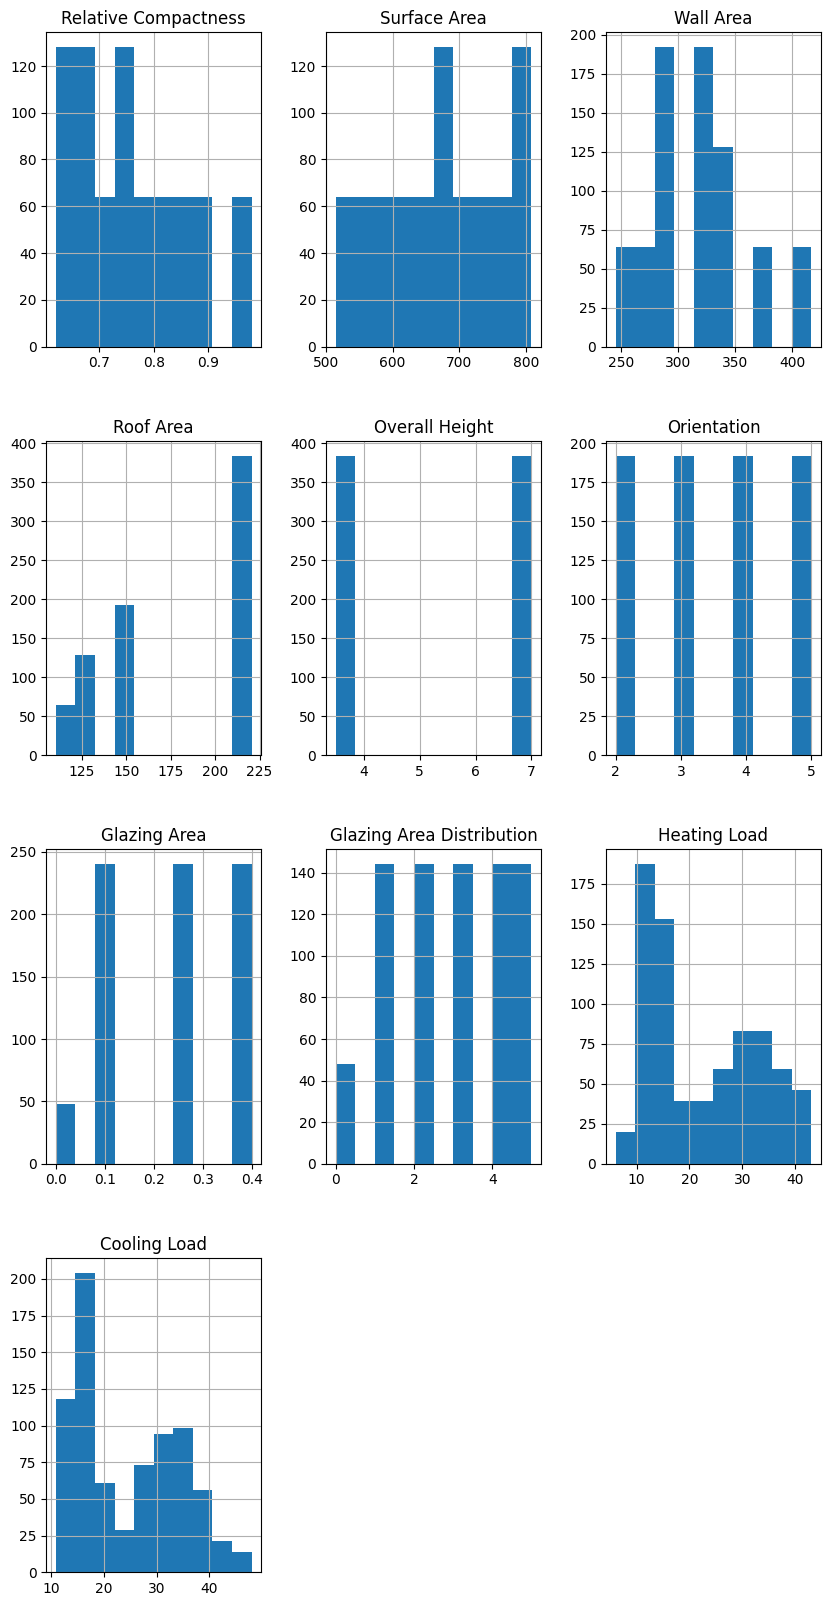

In [ ]:
# histogram of each column
df.hist(figsize=(10,20));

Dari histogram diatas, kita mendapatkan

* Beberapa histogram condong ke kiri
* Beberapa histogram condong ke kanan
* Histogram tidak terdistribusi  normal ataupun uniform  

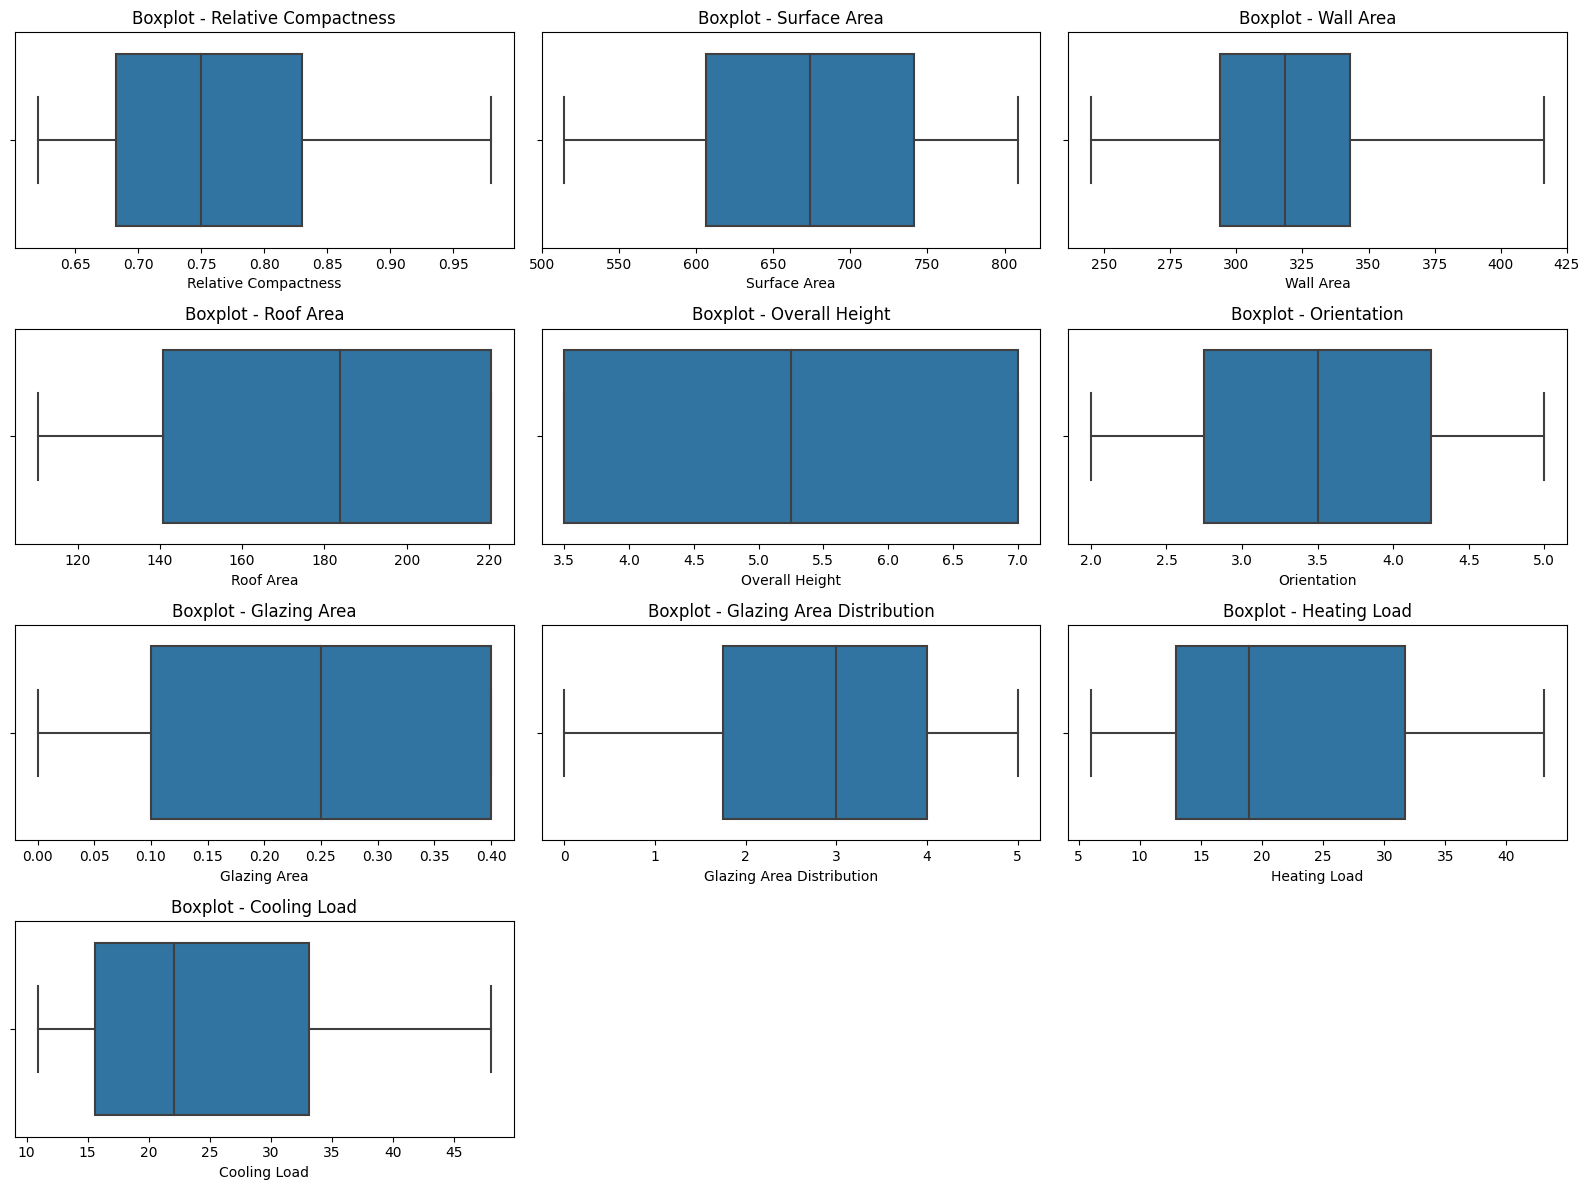

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setel ukuran plot
plt.figure(figsize=(16, 12))

# Menentukan jumlah baris dan kolom
num_rows = 4
num_cols = 3

# Loop melalui setiap kolom fitur pada DataFrame
features = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot - {feature}')

# Tampilkan plot
plt.tight_layout()
plt.show()


Dari boxplot diatas, kita dapat melihat tidak adanya outlier yang dapat mengganggu hasil akhir model

Ketika tidak terdapat outlier dalam dataset, berbagai dampak positif dapat dirasakan dalam analisis data dan pembuatan model. Keberadaan data ekstrem dapat mempengaruhi stabilitas model, dan dengan ketiadaan outlier, model cenderung lebih stabil.

Analisis data juga menjadi lebih sederhana karena tidak perlu mempertimbangkan pengaruh nilai-nilai ekstrem. Statistik deskriptif seperti rata-rata, median, dan kuartil dapat memberikan gambaran yang lebih akurat tentang distribusi data.

Sehingga model yang akan kita latih nantinya akan memiliki potensi untuk lebih baik menggeneralisasi pola dalam data, mengurangi risiko overfitting, dan menghasilkan hasil prediksi yang lebih andal.

Text(0.5, 1.0, 'Correlation Matrix')

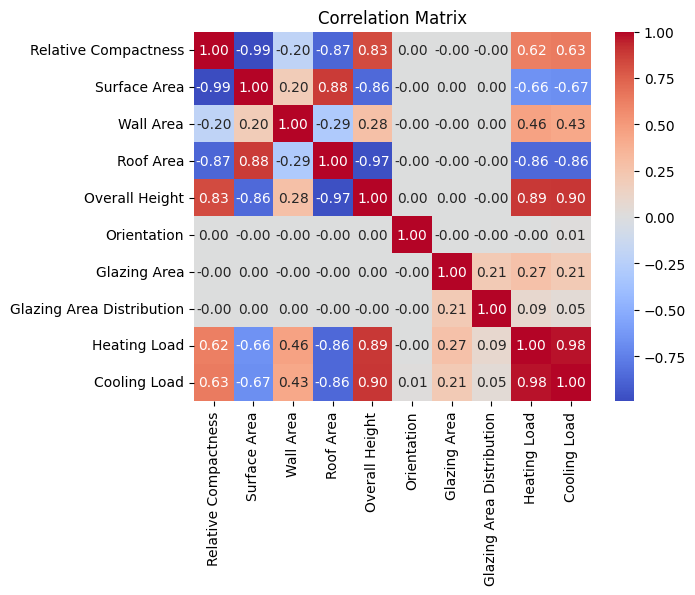

In [ ]:
# Matrix korelasi untuk melihat hubungan antar variabel numerik
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

Hasil :

Ada beberapa features yang mempunyai korelasi kuat, diantaranya:

* Overall Height & Heating Load, Cooling Load
* Roof Area & Surface Area
* Overall Height & Relative Compactness
* dll

Secara keseluruhan, terlihat bahwa Heating Load dan Cooling Load memiliki korelasi positif dengan hampir semua fitur lainnya. Oleh karena itu, dapat disimpulkan bahwa menggunakan kedua fitur ini, yaitu Heating Load dan Cooling Load, mungkin akan memberikan informasi yang paling relevan atau memiliki pengaruh yang signifikan dalam analisis atau pemodelan yang akan dilakukan. Fitur-fitur ini dapat dijadikan fokus utama dalam tahap selanjutnya untuk meningkatkan pemahaman dan prediksi terhadap performa termal bangunan atau sistem yang sedang diukur.

Pearson Correlation Coefficient: 0.8894306741007043
P-value: 1.1409232650145028e-262


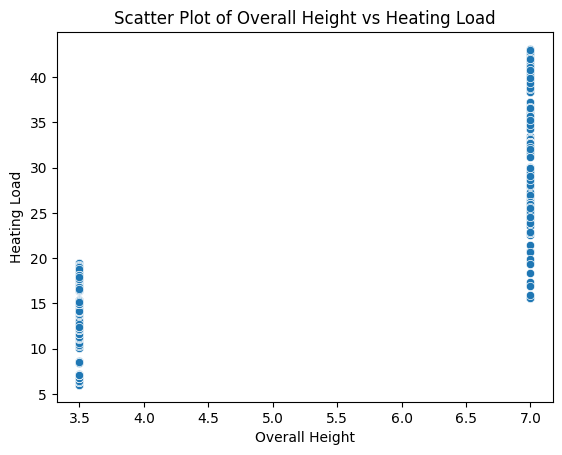

In [ ]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot untuk hubungan dua variabel numerik
sns.scatterplot(x='Overall Height', y='Heating Load', data=df)
plt.title('Scatter Plot of Overall Height vs Heating Load')

# Menghitung koefisien korelasi Pearson
corr_coefficient, p_value = pearsonr(df['Overall Height'], df['Heating Load'])
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Menampilkan plot
plt.show()


Scatter plot menunjukkan hubungan antara tinggi keseluruhan bangunan dan beban pemanas (heating load). Berdasarkan scatter plot tersebut, dapat dilihat bahwa terdapat hubungan positif antara kedua variabel tersebut. Artinya, semakin tinggi bangunan, maka beban pemanasannya akan semakin besar.

Hal ini dapat dijelaskan dengan beberapa alasan:

Bangunan yang lebih tinggi memiliki lebih banyak permukaan luar yang terpapar udara luar yang dingin. Hal ini menyebabkan panas dari dalam bangunan dapat lebih mudah keluar, sehingga membutuhkan beban pemanas yang lebih besar.
Bangunan yang lebih tinggi juga memiliki lebih banyak volume udara yang harus dipanaskan. Hal ini juga menyebabkan beban pemanasan menjadi lebih besar.
Bangunan yang lebih tinggi seringkali memiliki desain yang lebih kompleks, dengan banyak jendela dan pintu. Hal ini dapat menyebabkan kebocoran udara, yang membuat panas dari dalam bangunan lebih mudah keluar dan membutuhkan beban pemanas yang lebih besar.
Berdasarkan scatter plot tersebut, dapat disimpulkan bahwa hubungan antara tinggi keseluruhan dan beban pemanas adalah positif dan kuat. Artinya, jika tinggi keseluruhan bangunan meningkat, maka beban pemanasannya akan meningkat secara signifikan.

Berikut adalah beberapa analisis tambahan yang dapat dilakukan terhadap scatter plot tersebut:

*   Distribusi data: Data terlihat terdistribusi secara meningkat di satu nilai, tidak ada pola tertentu yang dapat diamati.
Nilai outliers: Tidak ada nilai outliers yang terlihat.
*   Rentang data: Rentang data untuk tinggi keseluruhan adalah 3.5-7.0, sedangkan rentang data untuk beban pemanas adalah 15-40.
*   Korelasi: Koefisien korelasi antara tinggi keseluruhan dan beban pemanas adalah 0.89, yang menunjukkan hubungan yang sangat kuat.




Pearson Correlation Coefficient: 0.8957851688924499
P-value: 5.855770613021846e-272


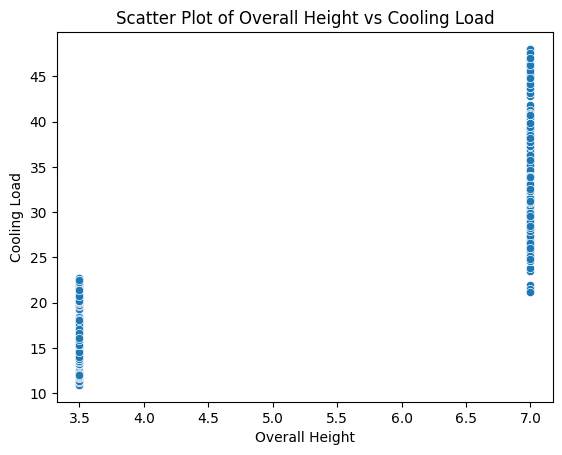

In [ ]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot untuk hubungan dua variabel numerik
sns.scatterplot(x='Overall Height', y='Cooling Load', data=df)
plt.title('Scatter Plot of Overall Height vs Cooling Load')

# Menghitung koefisien korelasi Pearson
corr_coefficient, p_value = pearsonr(df['Overall Height'], df['Cooling Load'])
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Menampilkan plot
plt.show()


Dari scatter plot tersebut, dapat dilihat bahwa terdapat hubungan positif antara tinggi keseluruhan (overall height) dan beban pendinginan (cooling load). Artinya, semakin tinggi bangunan, maka beban pendinginannya akan semakin besar.

Hal ini dapat dijelaskan dengan semakin tinggi bangunan, maka semakin besar pula volume udara yang harus didinginkan. Selain itu, semakin tinggi bangunan, maka semakin besar pula luas permukaan bangunan yang terkena paparan sinar matahari. Hal ini menyebabkan suhu udara di dalam bangunan akan semakin tinggi, sehingga membutuhkan beban pendinginan yang lebih besar.

In [ ]:
# cek data unik
df.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

Hasil mencari data unik menunjukkan distribusi nilai yang berbeda untuk setiap fitur dalam dataset. Beberapa fitur memiliki variasi yang cukup besar, sementara yang lain memiliki nilai yang cenderung seragam. Dari hasil tersebut, dapat diambil beberapa kesimpulan:

1. **Variabilitas Tinggi:**
   - Beberapa fitur, seperti Heating Load dan Cooling Load, menunjukkan variasi yang tinggi dengan jumlah data unik yang mencapai ratusan. Ini menunjukkan bahwa terdapat berbagai nilai yang berbeda untuk fitur-fitur ini, yang dapat memberikan informasi yang kaya dan bervariasi.

2. **Nilai Seragam:**
   - Sebaliknya, fitur-fitur seperti Overall Height dan Orientation memiliki jumlah data unik yang lebih rendah, menunjukkan kemungkinan nilai-nilai yang lebih seragam atau terbatas.

Pengaruh terhadap model regresi yang akan dibuat dapat bervariasi tergantung pada distribusi nilai dari masing-masing fitur. Fitur-fitur dengan variasi tinggi mungkin memberikan kontribusi lebih besar dalam menentukan prediksi model, sementara fitur dengan variasi rendah mungkin memiliki dampak yang lebih terbatas. Oleh karena itu, pada langkah selanjutnya dalam membuat model regresi, penting untuk mempertimbangkan:

- **Feature Scaling:** Jika terdapat perbedaan skala antara fitur-fitur yang memiliki variasi tinggi dan rendah, melakukan feature scaling seperti normalisasi atau standardisasi mungkin diperlukan untuk menghindari dominasi salah satu fitur terhadap yang lain.

- **Seleksi Fitur:** Fitur-fitur dengan variasi rendah atau yang tidak memiliki variasi signifikan mungkin dapat dieliminasi jika tidak memberikan kontribusi yang signifikan terhadap prediksi model.

# **MODELING**

In [ ]:
# set random seed
np.random.seed(42)
# Split data into X & y
X = df.drop(["Heating Load","Cooling Load"], axis=1)
y = df[["Heating Load", "Cooling Load"]]
y_h = df[["Heating Load"]]
y_c = df[["Cooling Load"]]

In [ ]:
# scaling the data
min_max_sc = MinMaxScaler()
stand_sc = StandardScaler()

# transfrom data
X_norm = min_max_sc.fit_transform(X)
X_stand = stand_sc.fit_transform(X)

In [ ]:
# Split data menjadi data train and test
X_train, X_test, yh_train, yh_test, yc_train, yc_test = train_test_split(X_norm,y_h, y_c,
                                                                        test_size=0.33, random_state=42)

Ukuran Dataset: Jika dataset sangat besar, mungkin memiliki lebih banyak fleksibilitas untuk mengalokasikan persentase yang lebih kecil untuk data testing. Sebaliknya, dengan dataset yang kecil, alokasi yang lebih besar untuk data testing mungkin diperlukan agar evaluasi model lebih stabil.

## SVM (Model yang digunakan)

**Ringkasan Metode**

SVM untuk regresi bertujuan membangun model yang dapat memprediksi nilai kontinu, bukan memisahkan kelas seperti pada klasifikasi.

Berikut adalah ringkasan cara kerja SVM untuk regresi:

* Penanganan Masalah Regresi: SVM dapat digunakan untuk masalah regresi dengan mencari hyperplane yang mendekati sebanyak mungkin titik data target.

* Penentuan Hyperplane Regresi: Model SVM mencari hyperplane yang mendekati sebanyak mungkin titik data target, dengan mempertimbangkan margin yang diizinkan.

* Penalty Parameter (C): Parameter C dalam SVM regresi mengontrol trade-off antara mendapatkan margin maksimum dan mengizinkan beberapa kesalahan prediksi. Nilai C yang lebih tinggi mengarah pada margin yang lebih kecil tetapi kesalahan prediksi yang lebih rendah, sedangkan nilai C yang lebih rendah memberikan margin yang lebih besar tetapi memungkinkan lebih banyak kesalahan prediksi.

* Kernel untuk Penanganan Masalah Non-Linear: Seperti pada SVM klasifikasi, SVM regresi dapat menggunakan kernel untuk menangani masalah regresi non-linear. Beberapa jenis kernel umum termasuk kernel linear, polynomial, radial basis function (RBF), dan sigmoid.

* Optimasi Model: Selama pelatihan, SVM mencari parameter dan hyperplane optimal dengan meminimalkan fungsi objektif yang mencakup margin, kesalahan prediksi, dan penalty parameter C.

* Pengukuran Kesalahan: Evaluasi performa SVM regresi menggunakan metrik seperti Mean Squared Error (MSE), yang mengukur seberapa baik model memprediksi nilai target.

**BASELINE MODEL**

In [ ]:
from sklearn.svm import SVR

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create baseline SVM models for Heating Load prediction
svm_model_yh = SVR(kernel='linear')  # Dapat memilih kernel berbeda (linear, rbf, polynomial, etc.)
svm_model_yh.fit(X_train_scaled, yh_train)
yh_pred = svm_model_yh.predict(X_test_scaled)
mse_yh = mean_squared_error(yh_test, yh_pred)
print('Baseline SVM Model for Heating Load:')
print('Mean Squared Error:', mse_yh)

# Create baseline SVM models for Cooling Load prediction
svm_model_yc = SVR(kernel='linear')  # Dapat memilih kernel berbeda  (linear, rbf, polynomial, etc.)
svm_model_yc.fit(X_train_scaled, yc_train)
yc_pred = svm_model_yc.predict(X_test_scaled)
mse_yc = mean_squared_error(yc_test, yc_pred)
print('\nBaseline SVM Model for Cooling Load:')
print('Mean Squared Error:', mse_yc)

Baseline SVM Model for Heating Load:
Mean Squared Error: 9.446735578566683

Baseline SVM Model for Cooling Load:
Mean Squared Error: 11.444286304645816


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Prediksi untuk Beban Pemanasan (Heating Load)
mae_yh = mean_absolute_error(yh_test, yh_pred)
r2_yh = r2_score(yh_test, yh_pred)

print('Metrik Evaluasi untuk Beban Pemanasan:')
print('Mean Absolute Error (MAE):', mae_yh)
print('R-squared (R2):', r2_yh)

# Prediksi untuk Beban Pendinginan (Cooling Load)
mae_yc = mean_absolute_error(yc_test, yc_pred)
r2_yc = r2_score(yc_test, yc_pred)

print('\nMetrik Evaluasi untuk Beban Pendinginan:')
print('Mean Absolute Error (MAE):', mae_yc)
print('R-squared (R2):', r2_yc)


Metrik Evaluasi untuk Beban Pemanasan:
Mean Absolute Error (MAE): 2.0890283592774193
R-squared (R2): 0.9094518452295094

Metrik Evaluasi untuk Beban Pendinginan:
Mean Absolute Error (MAE): 2.238778138351475
R-squared (R2): 0.8760339138297092




---


**Beban Pemanasan (Heating Load):**

---
* Mean Absolute Error (MAE): Sekitar 2.09. Ini menunjukkan rata-rata kesalahan absolut antara prediksi dan nilai sebenarnya adalah sekitar 2.09 unit (mungkin dalam satuan yang sama dengan variabel target).
* R-squared (R2): Sekitar 0.91. Ini menunjukkan bahwa sekitar 91% variabilitas dalam data beban pemanasan dapat dijelaskan oleh model SVM. Nilai ini mendekati 1, yang mengindikasikan model yang baik.




---


**Beban Pendinginan (Cooling Load):**

---
* Mean Absolute Error (MAE): Sekitar 2.24. Ini menunjukkan rata-rata kesalahan absolut antara prediksi dan nilai sebenarnya adalah sekitar 2.24 unit (mungkin dalam satuan yang sama dengan variabel target).
* R-squared (R2): Sekitar 0.88. Ini menunjukkan bahwa sekitar 88% variabilitas dalam data beban pendinginan dapat dijelaskan oleh model SVM. Nilai ini juga mendekati 1, menunjukkan kinerja model yang baik.


---


Secara keseluruhan, model SVM ini memberikan prediksi yang baik untuk kedua variabel target. Meskipun tidak ada nilai yang "sempurna," hasil ini menunjukkan bahwa model ini cukup baik dalam menangkap pola dalam data.



---

akan tetapi, kita akan melakukan hyperparameter tuning untuk meningkatkan akurasi model nya dan mendapatkan yang terbaik

#### MODEL EXPLORATION (3 skema model)

**HEATING LOAD : 3 Skema Model SVM (Hyperparameter tuning)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid untuk skema 1
param_grid_s1 = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Parameter grid untuk skema 2
param_grid_s2 = {
    'C': [1, 10, 20],  # Mengubah nilai C
    'kernel': ['linear', 'sigmoid'],  # Mengganti kernel ke 'sigmoid'
    'gamma': ['scale', 'auto']
}

# Parameter grid untuk skema 3
param_grid_s3 = {
    'C': [15],  # Mengubah nilai C
    'kernel': ['poly'],  # Mengganti kernel ke 'poly'
    'gamma': ['scale', 'auto'],
    'degree': [5]
}

# Inisialisasi model SVM untuk semua skema
svm_model = SVR()

# Inisialisasi GridSearchCV untuk skema 1
grid_search_s1 = GridSearchCV(svm_model, param_grid=param_grid_s1, cv=5, scoring='neg_mean_squared_error')

# Inisialisasi GridSearchCV untuk skema 2
grid_search_s2 = GridSearchCV(svm_model, param_grid=param_grid_s2, cv=5, scoring='neg_mean_squared_error')

# Inisialisasi GridSearchCV untuk skema 3
grid_search_s3 = GridSearchCV(svm_model, param_grid=param_grid_s3, cv=5, scoring='neg_mean_squared_error')

# Melakukan pencarian hiperparameter untuk skema 1
grid_search_s1.fit(X_train_scaled, yh_train)

# Melakukan pencarian hiperparameter untuk skema 2
grid_search_s2.fit(X_train_scaled, yh_train)

# Melakukan pencarian hiperparameter untuk skema 3
grid_search_s3.fit(X_train_scaled, yh_train)

# Menampilkan parameter terbaik untuk setiap skema
print('Best Parameters for Scheme 1 (SVM):', grid_search_s1.best_params_)
print('Best Parameters for Scheme 2 (SVM):', grid_search_s2.best_params_)
print('Best Parameters for Scheme 3 (SVM):', grid_search_s3.best_params_)

# Mengevaluasi model terbaik pada set pengujian untuk setiap skema
yh_pred_s1 = grid_search_s1.best_estimator_.predict(X_test_scaled)
mse_yh_s1 = mean_squared_error(yh_test, yh_pred_s1)
print('\nMean Squared Error (SVM Scheme 1):', mse_yh_s1)

yh_pred_s2 = grid_search_s2.best_estimator_.predict(X_test_scaled)
mse_yh_s2 = mean_squared_error(yh_test, yh_pred_s2)
print('Mean Squared Error (SVM Scheme 2):', mse_yh_s2)

yh_pred_s3 = grid_search_s3.best_estimator_.predict(X_test_scaled)
mse_yh_s3 = mean_squared_error(yh_test, yh_pred_s3)
print('Mean Squared Error (SVM Scheme 3):', mse_yh_s3)


Best Parameters for Scheme 1 (SVM): {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Parameters for Scheme 2 (SVM): {'C': 20, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for Scheme 3 (SVM): {'C': 15, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}

Mean Squared Error (SVM Scheme 1): 0.8641080528425885
Mean Squared Error (SVM Scheme 2): 9.17068842721096
Mean Squared Error (SVM Scheme 3): 16.602145433681127


**Scheme 1 (SVM)** adalah pilihan terbaik dengan MSE terendah, menunjukkan bahwa parameter dan kernel yang dipilih memberikan model yang efektif untuk kasus ini.

**COOLING LOAD : 3 Skema Model SVM (Hyperparameter tuning)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid untuk skema 1
param_grid_s1 = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Parameter grid untuk skema 2
param_grid_s2 = {
    'C': [10, 100, 1000],  # Mengubah nilai C
    'kernel': ['linear', 'sigmoid'],  # Mengganti kernel ke 'sigmoid'
    'gamma': ['scale', 'auto'],
}

# Parameter grid untuk skema 3
param_grid_s3 = {
    'C': [0.1, 1, 10],  # Mengubah nilai C
    'kernel': ['rbf', 'sigmoid'],  # Mengganti kernel ke 'rbf' dan 'sigmoid'
    'gamma': ['scale', 'auto'],
}

# Inisialisasi model SVM untuk semua skema
svm_model = SVR()

# Inisialisasi GridSearchCV untuk skema 1
grid_search_s1 = GridSearchCV(svm_model, param_grid=param_grid_s1, cv=5, scoring='neg_mean_squared_error')

# Inisialisasi GridSearchCV untuk skema 2
grid_search_s2 = GridSearchCV(svm_model, param_grid=param_grid_s2, cv=5, scoring='neg_mean_squared_error')

# Inisialisasi GridSearchCV untuk skema 3
grid_search_s3 = GridSearchCV(svm_model, param_grid=param_grid_s3, cv=5, scoring='neg_mean_squared_error')

# Melakukan pencarian hiperparameter untuk skema 1
grid_search_s1.fit(X_train_scaled, yc_train)

# Melakukan pencarian hiperparameter untuk skema 2
grid_search_s2.fit(X_train_scaled, yc_train)

# Melakukan pencarian hiperparameter untuk skema 3
grid_search_s3.fit(X_train_scaled, yc_train)

# Menampilkan parameter terbaik untuk setiap skema
print('Best Parameters for Scheme 1 (SVM):', grid_search_s1.best_params_)
print('Best Parameters for Scheme 2 (SVM):', grid_search_s2.best_params_)
print('Best Parameters for Scheme 3 (SVM):', grid_search_s3.best_params_)

# Mengevaluasi model terbaik pada set pengujian untuk setiap skema
yc_pred_s1 = grid_search_s1.best_estimator_.predict(X_test_scaled)
mse_yc_s1 = mean_squared_error(yc_test, yc_pred_s1)
print('\nMean Squared Error (SVM Scheme 1):', mse_yc_s1)

yc_pred_s2 = grid_search_s2.best_estimator_.predict(X_test_scaled)
mse_yc_s2 = mean_squared_error(yc_test, yc_pred_s2)
print('Mean Squared Error (SVM Scheme 2):', mse_yc_s2)

yc_pred_s3 = grid_search_s3.best_estimator_.predict(X_test_scaled)
mse_yc_s3 = mean_squared_error(yc_test, yc_pred_s3)
print('Mean Squared Error (SVM Scheme 3):', mse_yc_s3)


Best Parameters for Scheme 1 (SVM): {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Parameters for Scheme 2 (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for Scheme 3 (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Mean Squared Error (SVM Scheme 1): 3.5179895903135763
Mean Squared Error (SVM Scheme 2): 11.083788294466379
Mean Squared Error (SVM Scheme 3): 7.399361982485699


**Scheme 1 (SVM)** adalah pilihan terbaik dengan MSE terendah, menunjukkan bahwa parameter dan kernel yang dipilih memberikan model yang efektif untuk kasus ini.

#### MODEL EXPLORATION (sebagai perbandingan)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train_scaled, yh_train)

# Model 2: Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 0.2],
                 'max_depth': [3, 5, 7]}

gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train_scaled, yh_train)

# Model 3: Support Vector Machine (SVM)
svm_model = SVR()
svm_param_grid = {'C': [1, 10, 100],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}

svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='neg_mean_squared_error')
svm_grid_search.fit(X_train_scaled, yh_train)

# Model 4: Artificial Neural Network (ANN)
ann_model = MLPRegressor(random_state=42)
ann_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                  'activation': ['relu', 'tanh', 'logistic'],
                  'alpha': [0.0001, 0.001, 0.01]}

ann_grid_search = GridSearchCV(ann_model, ann_param_grid, cv=5, scoring='neg_mean_squared_error')
ann_grid_search.fit(X_train_scaled, yh_train)

# Evaluasi model terbaik untuk setiap jenis model
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_
svm_best_model = svm_grid_search.best_estimator_
ann_best_model = ann_grid_search.best_estimator_

# Evaluasi performa model terbaik pada data test
rf_predictions = rf_best_model.predict(X_test_scaled)
gb_predictions = gb_best_model.predict(X_test_scaled)
svm_predictions = svm_best_model.predict(X_test_scaled)
ann_predictions = ann_best_model.predict(X_test_scaled)

rf_mse = mean_squared_error(yh_test, rf_predictions)
gb_mse = mean_squared_error(yh_test, gb_predictions)
svm_mse = mean_squared_error(yh_test, svm_predictions)
ann_mse = mean_squared_error(yh_test, ann_predictions)

print(f"Random Forest MSE: {rf_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")
print(f"SVM MSE: {svm_mse}")
print(f"Artificial Neural Network (ANN) MSE: {ann_mse}")

Random Forest MSE: 0.23209671421259662
Gradient Boosting MSE: 0.16762912336931085
SVM MSE: 0.8641080528425038
Artificial Neural Network (ANN) MSE: 7.503619084671013


Hasil evaluasi model menunjukkan perbedaan kinerja yang signifikan di antara algoritma yang digunakan. Gradient Boosting memiliki Mean Squared Error (MSE) terendah, menunjukkan tingkat akurasi yang paling baik di antara model yang dievaluasi. Random Forest juga memberikan hasil yang baik, meskipun sedikit lebih tinggi dari Gradient Boosting.

Di sisi lain, SVM dan Artificial Neural Network (ANN) menunjukkan MSE yang lebih tinggi, dengan ANN memiliki tingkat kesalahan yang jauh lebih besar, mencapai 7.50.

Oleh karena itu, karena dari batasan tugas hanya bisa memilih beberapa model termasuk SVM, ANN, maka kita akan tetap menggunakan SVM karena MSE nya lebih kecil dari ANN

# **EVALUATION**

**HEATING LOAD**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid untuk skema 1
param_grid_s1 = {
    'C': [100],
    'kernel': ['rbf'],
    'gamma': ['scale'],
}

# Inisialisasi model SVM untuk semua skema
svm_model = SVR()

# Inisialisasi GridSearchCV untuk skema 1
grid_search_s1 = GridSearchCV(svm_model, param_grid=param_grid_s1, cv=5, scoring='neg_mean_squared_error')

# Melakukan pencarian hiperparameter untuk skema 1
grid_search_s1.fit(X_train_scaled, yh_train)

# Mengevaluasi model terbaik pada set pengujian untuk skema 1
yh_pred_s1 = grid_search_s1.best_estimator_.predict(X_test_scaled)

# Metrik evaluasi untuk yh (Heating Load)
mse_yh_s1 = mean_squared_error(yh_test, yh_pred_s1)
mae_yh_s1 = mean_absolute_error(yh_test, yh_pred_s1)
r2_yh_s1 = r2_score(yh_test, yh_pred_s1)

print("Metrik Evaluasi untuk Heating Load (SVM Scheme 1):")
print(f"MSE: {mse_yh_s1}")
print(f"MAE: {mae_yh_s1}")
print(f"R-squared: {r2_yh_s1}")

Metrik Evaluasi untuk Heating Load (SVM Scheme 1):
MSE: 0.8641080528425038
MAE: 0.701721470672678
R-squared: 0.9917174150735484


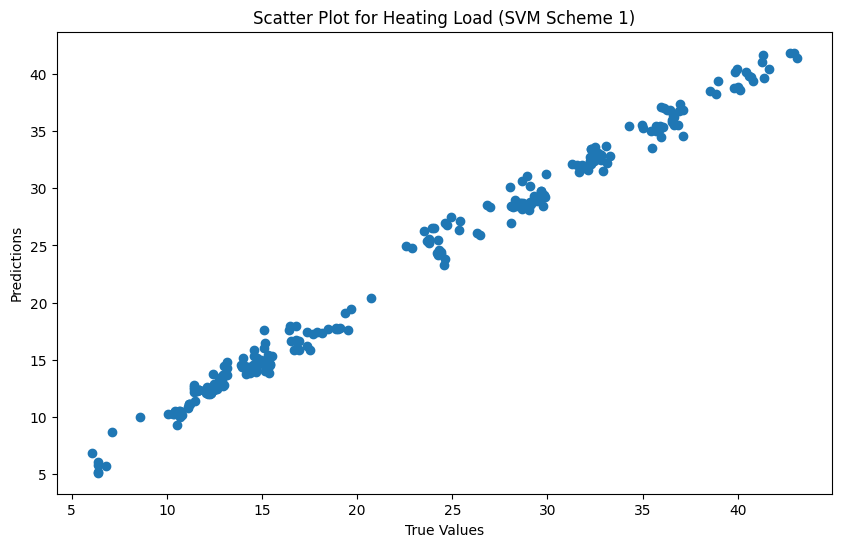

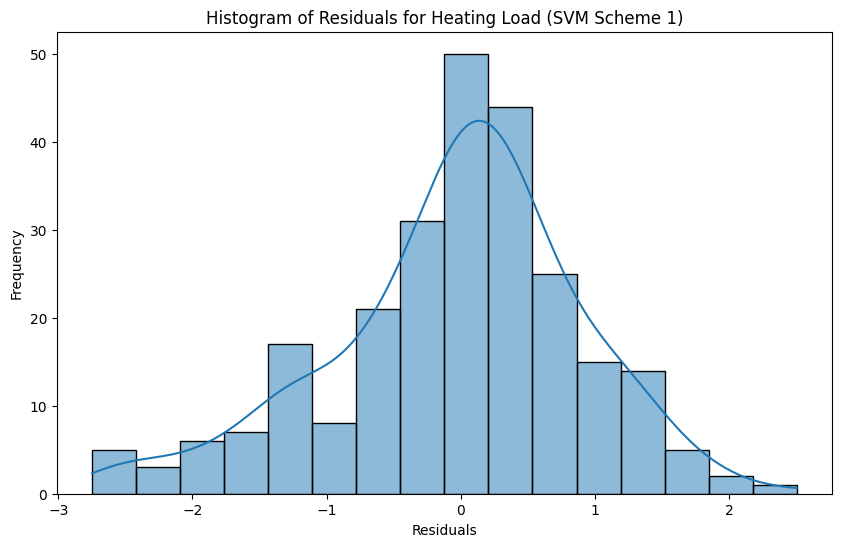

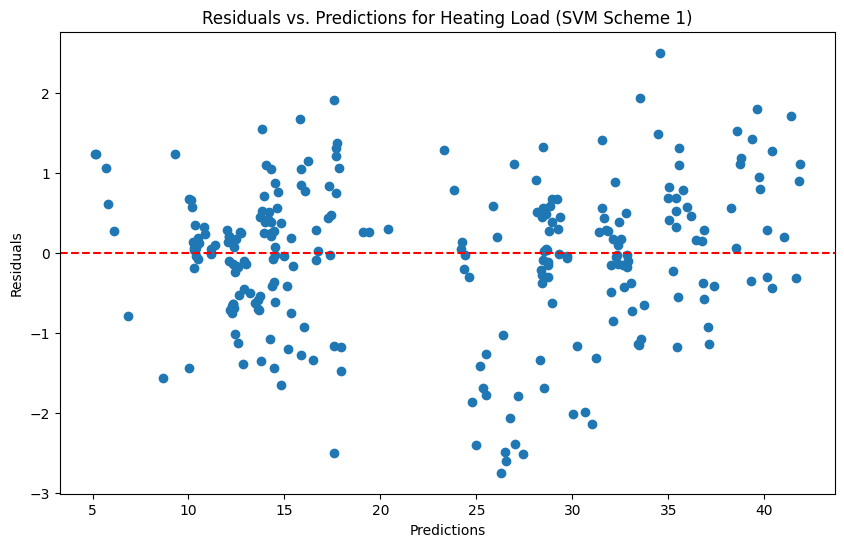

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(yh_test, yh_pred_s1)
plt.title('Scatter Plot for Heating Load (SVM Scheme 1)')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Histogram residu
residuals_yh = yh_test.values.flatten() - yh_pred_s1
plt.figure(figsize=(10, 6))
sns.histplot(residuals_yh, kde=True)
plt.title('Histogram of Residuals for Heating Load (SVM Scheme 1)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residu vs. prediksi
plt.figure(figsize=(10, 6))
plt.scatter(yh_pred_s1, residuals_yh)
plt.title('Residuals vs. Predictions for Heating Load (SVM Scheme 1)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


**COOLING LOAD**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid untuk skema 1
param_grid_s1 = {
    'C': [100],
    'kernel': ['rbf'],
    'gamma': ['auto'],
}

# Inisialisasi model SVM untuk semua skema
svm_model = SVR()

# Inisialisasi GridSearchCV untuk skema 1
grid_search_s1 = GridSearchCV(svm_model, param_grid=param_grid_s1, cv=5, scoring='neg_mean_squared_error')

# Melakukan pencarian hiperparameter untuk skema 1
grid_search_s1.fit(X_train_scaled, yc_train)

# Mengevaluasi model terbaik pada set pengujian untuk skema 1
yc_pred_s1 = grid_search_s1.best_estimator_.predict(X_test_scaled)

# Metrik evaluasi untuk yc (Cooling Load)
mse_yc_s1 = mean_squared_error(yc_test, yc_pred_s1)
mae_yc_s1 = mean_absolute_error(yc_test, yc_pred_s1)
r2_yc_s1 = r2_score(yc_test, yc_pred_s1)

print("\nMetrik Evaluasi untuk Cooling Load (SVM Scheme 1):")
print(f"MSE: {mse_yc_s1}")
print(f"MAE: {mae_yc_s1}")
print(f"R-squared: {r2_yc_s1}")



Metrik Evaluasi untuk Cooling Load (SVM Scheme 1):
MSE: 3.5179895903134253
MAE: 1.2598791566639989
R-squared: 0.961892652010817


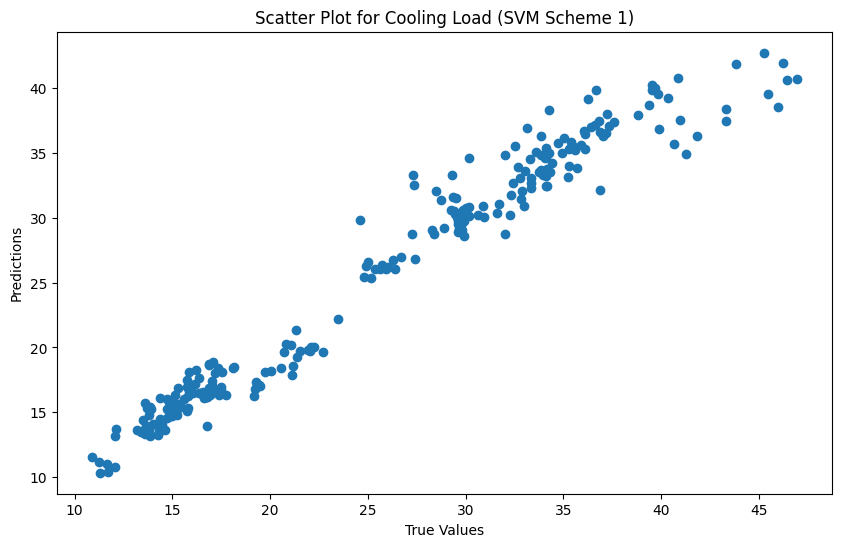

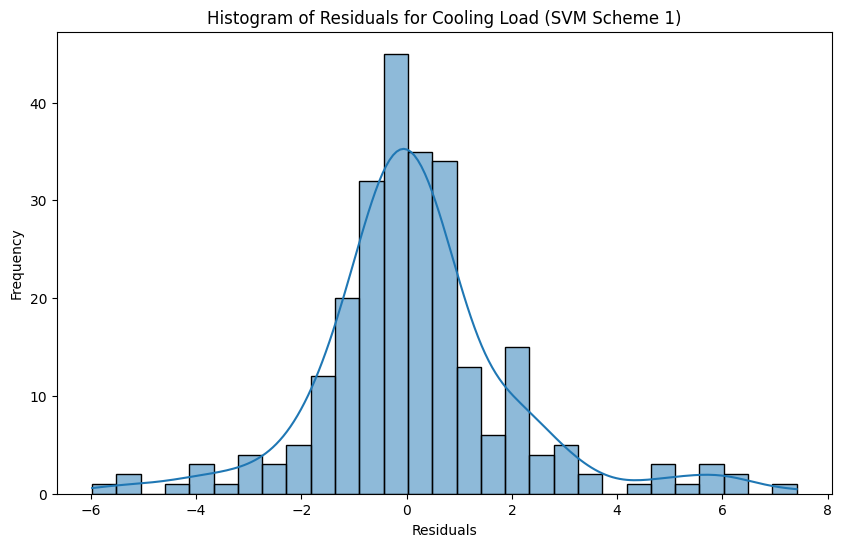

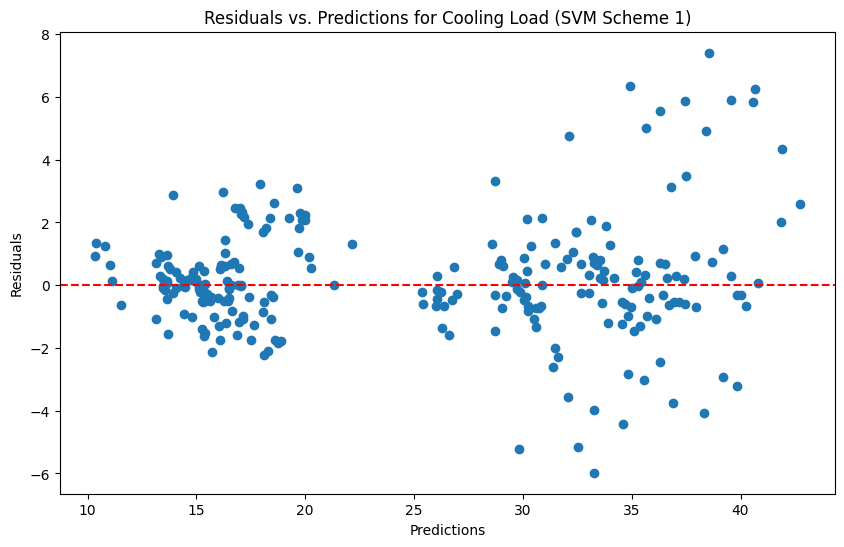

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(yc_test, yc_pred_s1)
plt.title('Scatter Plot for Cooling Load (SVM Scheme 1)')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Histogram residu
residuals_yc = yc_test.values.flatten() - yc_pred_s1
plt.figure(figsize=(10, 6))
sns.histplot(residuals_yc, kde=True)
plt.title('Histogram of Residuals for Cooling Load (SVM Scheme 1)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residu vs. prediksi
plt.figure(figsize=(10, 6))
plt.scatter(yc_pred_s1, residuals_yc)
plt.title('Residuals vs. Predictions for Cooling Load (SVM Scheme 1)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


## Hasil dan Analisis


---


**1. PREPROCESSING**
* Tidak ada missing values
* Tidak ada data duplikat
* Tidak ada outliers

Dari tahap preprocessing yang telah dilakukan, dapat diambil beberapa kesimpulan positif. Pertama, tidak adanya nilai yang hilang (missing values) mengindikasikan kualitas data yang baik, sehingga tidak perlu dilakukan imputasi atau penghapusan sejumlah besar data. Kedua, ketiadaan data duplikat memberikan kepastian bahwa setiap entri dalam dataset unik, yang penting untuk validitas analisis. Ketiga, tidak adanya outlier mengindikasikan bahwa tidak ada nilai ekstrem yang mungkin memengaruhi hasil analisis secara signifikan. Oleh karena itu, dapat disimpulkan bahwa data yang digunakan telah menjalani tahap preprocessing dengan baik, dan kualitasnya mendukung validitas dan reliabilitas hasil analisis yang akan dilakukan.

---


**2. EDA**
* Berdasarkan hasil heatmap, overall height merupakan yang mempunyai korelasi paling kuat dengan target yaitu heating load dan cooling load
* Koefisien korelasi(pearson) antara heating load dan overall height adalah 0.8894306741007043
* Koefisien korelasi(pearson) antara cooling load dan overall height adalah 0.8957851688924499

Hasil eksplorasi data (EDA) menunjukkan beberapa temuan yang signifikan terkait hubungan antara variabel-variabel tertentu dalam dataset. Berdasarkan visualisasi heatmap, terlihat bahwa fitur Overall Height memiliki korelasi paling kuat dengan variabel target, yaitu Heating Load dan Cooling Load. Hal ini diperkuat oleh koefisien korelasi Pearson yang tinggi, di mana hubungan antara Heating Load dan Overall Height memiliki koefisien sebesar 0.8894, sementara hubungan antara Cooling Load dan Overall Height memiliki koefisien sebesar 0.8958. Korelasi yang mendekati nilai 1 menandakan hubungan positif yang kuat antara variabel tersebut. Oleh karena itu, dapat disimpulkan bahwa Overall Height memiliki pengaruh yang signifikan terhadap beban pemanasan dan pendinginan, dan menjadi salah satu fitur kunci yang dapat dipertimbangkan dalam pembuatan model prediksi. Analisis ini memberikan pemahaman yang lebih mendalam tentang faktor-faktor yang dapat memengaruhi performa termal suatu bangunan, dan dapat menjadi dasar yang kuat untuk pengembangan model regresi atau prediktif yang lebih akurat.

---


**3. MODELLING (SVM)**

Dalam tahap pemodelan dengan menggunakan Support Vector Machine (SVM) untuk memprediksi Heating Load dan Cooling Load pada suatu bangunan, hasil baseline model menunjukkan performa yang cukup baik. Pada model baseline untuk Heating Load, diperoleh Mean Squared Error (MSE) sebesar 9.45 dan R-squared sebesar 0.91, sedangkan untuk Cooling Load, diperoleh MSE sebesar 11.44 dan R-squared sebesar 0.88. Namun, melalui eksplorasi model dengan melakukan tuning pada hyperparameter menggunakan tiga skema yang berbeda, hasil terbaik diperoleh pada skema pertama untuk kedua variabel target.

Pada skema pertama untuk Heating Load, parameter terbaik yang diambil adalah {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}, menghasilkan MSE sebesar 0.86. Sedangkan pada Cooling Load, parameter terbaik adalah {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}, dengan MSE sebesar 3.52. Pemilihan skema pertama didasarkan pada nilai MSE yang paling kecil, menunjukkan bahwa model SVM dengan parameter tersebut memberikan prediksi yang paling akurat.

Hasil ini memberikan indikasi bahwa model SVM yang telah di-tune dapat memberikan prediksi yang lebih baik dibandingkan dengan baseline model, dengan penggunaan parameter yang dioptimalkan untuk masing-masing skema. Oleh karena itu, skema pertama pada SVM akan diambil dan digunakan untuk proses selanjutnya, yang dapat mencakup evaluasi lebih lanjut serta integrasi model ke dalam aplikasi atau sistem yang diinginkan.

---

**4. EVALUATION**

**Heating Load**

* Metrik Evaluasi untuk Heating Load (SVM Scheme 1):
* MSE: 0.8641080528425038
* MAE: 0.701721470672678
* R-squared: 0.9917174150735484

**Cooling Load**

* Metrik Evaluasi untuk Cooling Load (SVM Scheme 1):
* MSE: 3.5179895903134253
* MAE: 1.2598791566639989
* R-squared: 0.961892652010817


---


**Hasil uji model yang sudah dilatih (prediksi) (Ada dibawah bab kesimpulan)**

**Heating Load**

[254 rows x 2 columns]
* Rata-rata Aktual: 22.993622047244095
* Rata-rata Prediksi: 25.123223736410136


---


**Cooling Load**

[254 rows x 2 columns]
* Rata-rata Aktual: 25.311259842519682
* Rata-rata Prediksi: 25.123223736410136


---




## Kesimpulan


---


Berdasarkan hasil dan analisis yang telah dilakukan, dapat disimpulkan beberapa hal:


---


1. Preprocessing:
* Data tidak mengandung nilai yang hilang, duplikat, atau outlier yang signifikan.


---


2. EDA (Exploratory Data Analysis):
* Korelasi antara variabel overall height dengan heating load dan cooling load cukup kuat.
* Koefisien korelasi (pearson) antara heating load dan overall height adalah 0.8894, sedangkan antara cooling load dan overall height adalah 0.8958.


---


3. Baseline Model SVM:
* Model SVM baseline untuk heating load dan cooling load memiliki performa yang dapat diterima, dengan MSE dan MAE yang relatif rendah.
* Explorasi Model SVM (Hyperparameter Tuning): Melalui proses hyperparameter tuning, skema 1 dipilih karena memberikan Mean Squared Error (MSE) terkecil untuk kedua variabel target (heating load dan cooling load).


---


4. Evaluasi Model (Skema 1):
* Model SVM dengan skema 1 memberikan hasil evaluasi yang baik untuk kedua variabel target, dengan MSE yang rendah dan R-squared yang tinggi.
* Prediksi pada Data Test: Hasil prediksi pada data test menunjukkan bahwa model mampu memberikan prediksi yang cukup akurat dengan rata-rata prediksi yang mendekati rata-rata aktual.
* Dengan demikian, model SVM dengan skema 1 dapat dianggap sebagai model yang sesuai untuk memprediksi heating load dan cooling load pada dataset ini. Meskipun demikian, peningkatan performa model dapat terus dieksplorasi melalui penggunaan model lain atau pendekatan yang lebih kompleks.


---


5. Optimasi Lanjutan:
* Penggunaan teknik lain seperti Random Forest dan Gradient Boosting juga dapat dieksplorasi untuk membandingkan kinerja mereka dengan SVM karena MSE lebih kecil (Dapat dilihat pada sub bab model exploration di bagian ANN diatas), Namun karena dalam tugas ini ada batasan model yang bisa digunakan, maka untuk project ini menggunakan SVM karena MSE nya lebih kecil dari ANN


---


Secara keseluruhan, analisis ini melibatkan langkah-langkah penting dalam siklus pemodelan data, dimulai dari tahap preprocessing hingga evaluasi hasil model. Hasil preprocessing menunjukkan bahwa data tidak memiliki nilai yang hilang, duplikat, atau outlier, memberikan dasar yang solid untuk analisis lebih lanjut. Eksplorasi data menyoroti Overall Height sebagai fitur dengan korelasi paling kuat terhadap Heating Load dan Cooling Load.

Pada tahap pemodelan dengan menggunakan Support Vector Machine (SVM), skema pertama setelah hyperparameter tuning terpilih sebagai yang terbaik untuk memprediksi Heating Load dan Cooling Load, menghasilkan MSE yang signifikan lebih rendah dibandingkan dengan baseline model. Evaluasi model SVM pada skema pertama menunjukkan performa yang sangat baik, dengan R-squared yang tinggi, menandakan kemampuan model dalam menjelaskan variasi yang tinggi dalam data.

Hasil uji prediksi pada data (pada bab PREDICTION ON DATA TEST dibawah) yang tidak pernah dilihat sebelumnya menegaskan kemampuan model SVM dalam memberikan prediksi yang mendekati nilai aktual untuk Heating Load dan Cooling Load. Rata-rata prediksi dan aktual yang berdekatan menunjukkan keakuratan model dalam menggeneralisasi pola yang telah dipelajari dari data pelatihan.

Dengan demikian, kesimpulan akhir adalah bahwa model SVM pada skema pertama telah berhasil menghasilkan prediksi yang akurat untuk Heating Load dan Cooling Load pada suatu bangunan. Model ini dapat diandalkan untuk digunakan dalam memahami dan mengoptimalkan performa termal bangunan, serta memberikan kontribusi positif dalam pengambilan keputusan terkait efisiensi energi dan desain bangunan.


---



# **PREDICTION ON DATA TEST**

In [ ]:
# Buat prediksi pada data tes (heating load)
yh_pred_s1 = grid_search_s1.best_estimator_.predict(X_test_scaled)
yh_pred_s1

array([18.73398876, 16.5186938 , 33.02693677, 41.90138538, 18.07764131,
       29.81681588, 26.05596205, 29.5118043 , 19.6316857 , 32.43682947,
       19.70666067, 35.39732529, 29.73871044, 13.46036863, 20.26354876,
       36.63852831, 36.30543721, 14.82247247, 16.16676431, 35.08876438,
       32.68052239, 42.71147606, 15.40734561, 38.31804357, 16.22155573,
       37.42925159, 35.80767678, 29.86193908, 17.90349051, 16.09850374,
       13.47698932, 15.40765165, 18.20663485, 34.5869312 , 38.40419609,
       30.11881297, 33.55706027, 34.20234662, 35.01688175, 13.1498549 ,
       30.7363029 , 14.74731985, 10.34313418, 30.35756524, 10.81545895,
       11.01392828, 13.7011492 , 13.28574823, 35.71601107, 35.2053118 ,
       36.11361101, 16.6412641 , 18.09437887, 37.96805603, 14.7400065 ,
       17.09877351, 15.07518145, 33.28243622, 39.19863076, 36.70536489,
       16.41458549, 18.61057527, 17.1260516 , 29.22000229, 30.85308034,
       34.00821363, 36.32123473, 15.28149801, 14.05451046, 14.80

     Actual  Predicted
0     16.47  18.733989
1     13.17  16.518694
2     32.82  33.026937
3     41.32  41.901385
4     16.69  18.077641
..      ...        ...
249   36.43  37.167696
250   14.34  15.170319
251   11.53  15.705892
252   32.13  30.172216
253   36.57  35.308240

[254 rows x 2 columns]
Rata-rata Aktual: 22.993622047244095
Rata-rata Prediksi: 25.123223736410136


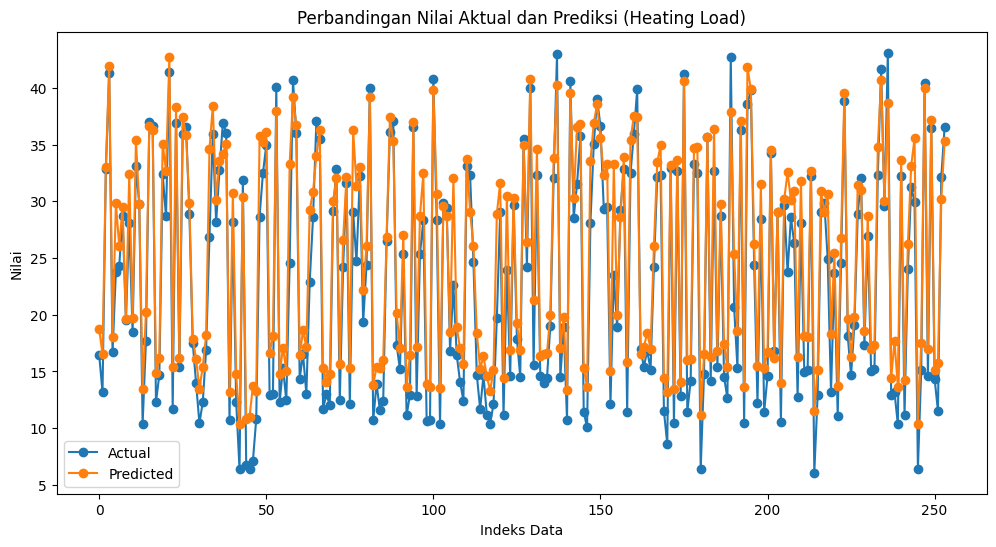

In [ ]:
import pandas as pd

# Data aktual
actual_values = yh_test.values

# Buat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({
    'Actual': actual_values.flatten(),
    'Predicted': yh_pred_s1.flatten()
})

# Tampilkan DataFrame
print(comparison_df)

# Hitung rata-rata aktual
mean_actual = np.mean(actual_values)

# Hitung rata-rata prediksi
mean_predicted = np.mean(yh_pred_s1)

print(f"Rata-rata Aktual: {mean_actual}")
print(f"Rata-rata Prediksi: {mean_predicted}")

# Buat plot
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted', marker='o')
plt.title('Perbandingan Nilai Aktual dan Prediksi (Heating Load)')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.legend()
plt.show()

In [ ]:
# Meletakkan hasil heating prediction pada sebuah series
df_test_heating = pd.Series(data = yh_pred_s1, name="Heating Load")
df_test_heating

0      18.733989
1      16.518694
2      33.026937
3      41.901385
4      18.077641
         ...    
249    37.167696
250    15.170319
251    15.705892
252    30.172216
253    35.308240
Name: Heating Load, Length: 254, dtype: float64

In [ ]:
# Buat prediksi pada data tes (cooling load)
yc_pred_s1 = grid_search_s1.best_estimator_.predict(X_test_scaled)
yc_pred_s1

array([18.73398876, 16.5186938 , 33.02693677, 41.90138538, 18.07764131,
       29.81681588, 26.05596205, 29.5118043 , 19.6316857 , 32.43682947,
       19.70666067, 35.39732529, 29.73871044, 13.46036863, 20.26354876,
       36.63852831, 36.30543721, 14.82247247, 16.16676431, 35.08876438,
       32.68052239, 42.71147606, 15.40734561, 38.31804357, 16.22155573,
       37.42925159, 35.80767678, 29.86193908, 17.90349051, 16.09850374,
       13.47698932, 15.40765165, 18.20663485, 34.5869312 , 38.40419609,
       30.11881297, 33.55706027, 34.20234662, 35.01688175, 13.1498549 ,
       30.7363029 , 14.74731985, 10.34313418, 30.35756524, 10.81545895,
       11.01392828, 13.7011492 , 13.28574823, 35.71601107, 35.2053118 ,
       36.11361101, 16.6412641 , 18.09437887, 37.96805603, 14.7400065 ,
       17.09877351, 15.07518145, 33.28243622, 39.19863076, 36.70536489,
       16.41458549, 18.61057527, 17.1260516 , 29.22000229, 30.85308034,
       34.00821363, 36.32123473, 15.28149801, 14.05451046, 14.80

     Actual  Predicted
0     16.90  18.733989
1     16.39  16.518694
2     32.78  33.026937
3     46.23  41.901385
4     19.76  18.077641
..      ...        ...
249   36.62  37.167696
250   14.96  15.170319
251   13.59  15.705892
252   32.28  30.172216
253   36.10  35.308240

[254 rows x 2 columns]
Rata-rata Aktual: 25.311259842519682
Rata-rata Prediksi: 25.123223736410136


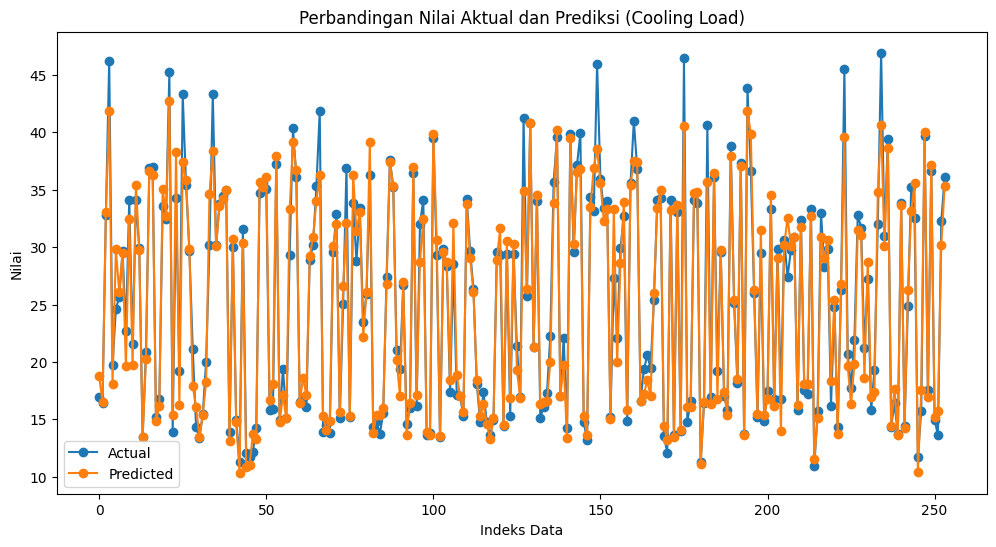

In [ ]:
import pandas as pd

# Data aktual
actual_values = yc_test.values

# Buat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({
    'Actual': actual_values.flatten(),
    'Predicted': yc_pred_s1.flatten()
})

# Tampilkan DataFrame
print(comparison_df)

# Hitung rata-rata aktual
mean_actual = np.mean(actual_values)

# Hitung rata-rata prediksi
mean_predicted = np.mean(yc_pred_s1)

print(f"Rata-rata Aktual: {mean_actual}")
print(f"Rata-rata Prediksi: {mean_predicted}")

# Buat plot
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted', marker='o')
plt.title('Perbandingan Nilai Aktual dan Prediksi (Cooling Load)')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.legend()
plt.show()

In [ ]:
# Meletakkah hasil cooling prediction pada sebuah series
df_test_cooling = pd.Series(data = yc_pred_s1, name="Cooling Load")
df_test_cooling

0      18.733989
1      16.518694
2      33.026937
3      41.901385
4      18.077641
         ...    
249    37.167696
250    15.170319
251    15.705892
252    30.172216
253    35.308240
Name: Cooling Load, Length: 254, dtype: float64

In [ ]:
# Menggabungkan kedua series (heating load dan cooling load)
df_preds = pd.concat([df_test_heating, df_test_cooling], axis=1)
df_preds

,Heating Load,Cooling Load
0,18.733989,18.733989
1,16.518694,16.518694
2,33.026937,33.026937
3,41.901385,41.901385
4,18.077641,18.077641
...,...,...
249,37.167696,37.167696
250,15.170319,15.170319
251,15.705892,15.705892
252,30.172216,30.172216


In [ ]:
# Menyimpan DataFrame ke file CSV
df_preds.to_csv('predictions.csv', index=False)